In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# drop null values
df.dropna(inplace=True)

In [11]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

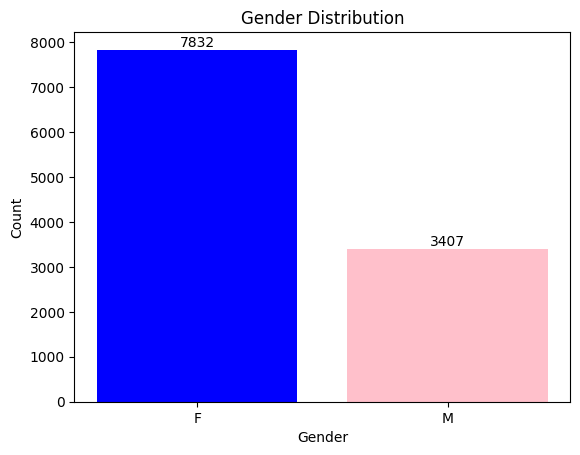

In [16]:
#plotting a bar chart for Gender and it's count

import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Define colors for the bars
colors = ['blue', 'pink']

# Plot the bar chart with custom colors
plt.bar(gender_counts.index, gender_counts, color=colors)

# Add text annotations for the values at the top of each bar
for i, count in enumerate(gender_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Display the plot
plt.show()


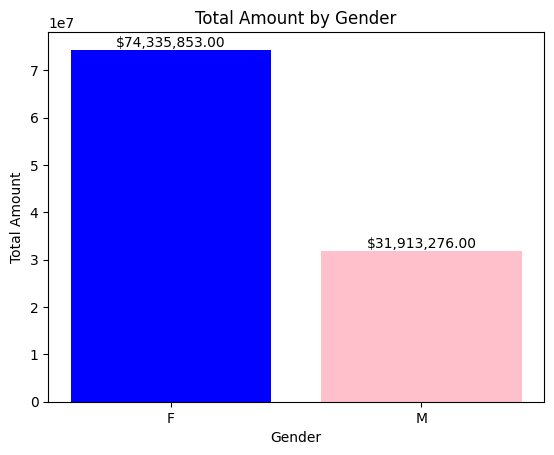

In [17]:
# plotting a bar chart for gender vs total amount

import matplotlib.pyplot as plt

# Group by 'Gender' and calculate the sum of 'Amount' for each group
gender_amount_sum = df.groupby('Gender')['Amount'].sum()

# Plot the bar chart
plt.bar(gender_amount_sum.index, gender_amount_sum, color=['blue', 'pink'])

# Add text annotations for the total amount at the top of each bar
for i, amount in enumerate(gender_amount_sum):
    plt.text(i, amount + 0.1, f"${amount:,.2f}", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Total Amount by Gender')

# Display the plot
plt.show()


*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

In [18]:
print(df.columns)



Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


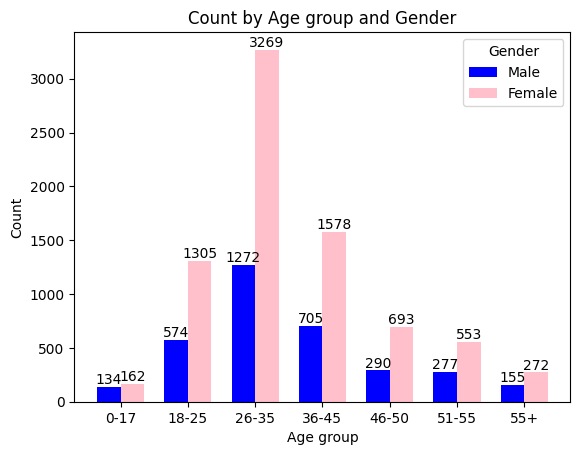

In [19]:
# Plot between count and Age group 
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Age group' and 'Gender', and calculate the count for each group
age_gender_count = df.groupby(['Age Group', 'Gender']).size().unstack()

# Get unique age groups and genders for positioning
unique_age_groups = age_gender_count.index
unique_genders = age_gender_count.columns

# Set the width of each bar
bar_width = 0.35

# Calculate positions for each bar
positions = range(len(unique_age_groups))
positions_male = [pos - bar_width/2 for pos in positions]
positions_female = [pos + bar_width/2 for pos in positions]

# Plot the bar chart
plt.bar(positions_male, age_gender_count['M'], width=bar_width, label='Male', color='blue')
plt.bar(positions_female, age_gender_count['F'], width=bar_width, label='Female', color='pink')

# Add text annotations for the count at the top of each bar
for i, age_group in enumerate(unique_age_groups):
    male_count = age_gender_count.loc[age_group, 'M']
    female_count = age_gender_count.loc[age_group, 'F']
    plt.text(positions_male[i], male_count + 0.1, str(male_count), ha='center', va='bottom')
    plt.text(positions_female[i], female_count + 0.1, str(female_count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Age group')
plt.ylabel('Count')
plt.title('Count by Age group and Gender')
plt.xticks(positions, unique_age_groups)
plt.legend(title='Gender')

# Display the plot
plt.show()





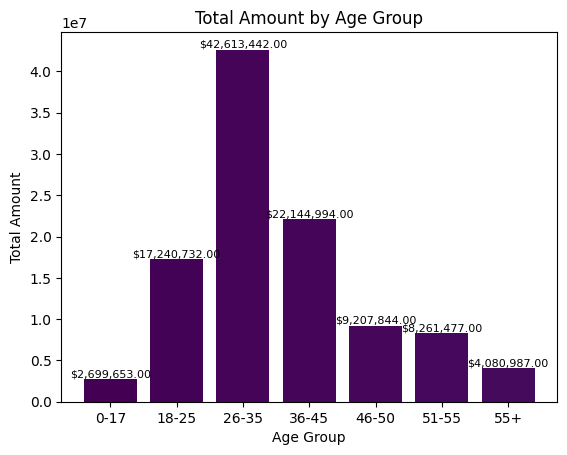

In [20]:
# Bar graph plot-Total Amount vs Age Group 
import matplotlib.pyplot as plt

# Group by 'Age group' and calculate the sum of 'Amount' for each group
age_amount_sum = df.groupby('Age Group')['Amount'].sum()

# Get unique age groups for positioning
unique_age_groups = age_amount_sum.index

# Plot the bar chart with different colors for each bar
bars = plt.bar(unique_age_groups, age_amount_sum, color=plt.cm.viridis(range(len(unique_age_groups))))

# Add text annotations for the total amount at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, f"${height:,.2f}", ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.title('Total Amount by Age Group')

# Display the plot
plt.show()





*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

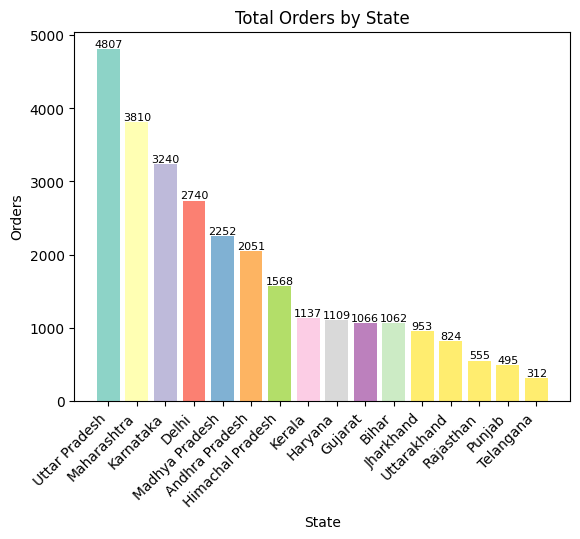

In [21]:
# Bar chart plot- Orders vs State 
import matplotlib.pyplot as plt

# Group by 'State' and calculate the sum of 'Orders' for each group
state_orders_sum = df.groupby('State')['Orders'].sum()

# Sort the values in descending order
state_orders_sum = state_orders_sum.sort_values(ascending=False)

# Get unique states for positioning
unique_states = state_orders_sum.index

# Plot the bar chart with different colors for each bar
bars = plt.bar(unique_states, state_orders_sum, color=plt.cm.Set3(range(len(unique_states))))

# Add text annotations for the total orders at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Orders')
plt.title('Total Orders by State')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


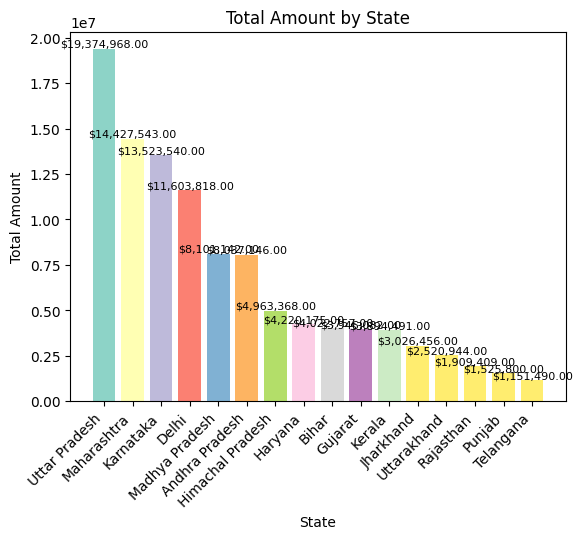

In [22]:
# Bar chart plot- Total Amount vs State 
import matplotlib.pyplot as plt

# Group by 'State' and calculate the sum of 'Amount' for each group
state_amount_sum = df.groupby('State')['Amount'].sum()

# Sort the values in descending order
state_amount_sum = state_amount_sum.sort_values(ascending=False)

# Get unique states for positioning
unique_states = state_amount_sum.index

# Plot the bar chart with different colors for each bar
bars = plt.bar(unique_states, state_amount_sum, color=plt.cm.Set3(range(len(unique_states))))

# Add text annotations for the total amount at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, f"${height:,.2f}", ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.title('Total Amount by State')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()




*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

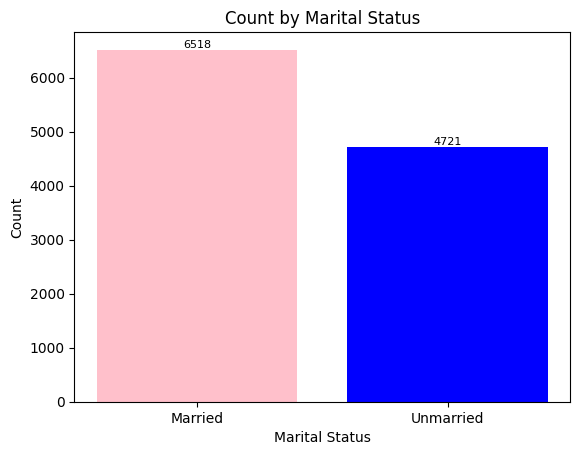

In [23]:
# Bar plot between Count and Marital Status 
import matplotlib.pyplot as plt

# Group by 'Marital_Status' and calculate the count for each group
marital_status_count = df['Marital_Status'].value_counts().sort_index(ascending=False)

# Get unique marital statuses for positioning
unique_statuses = marital_status_count.index

# Plot the bar chart with different colors for each bar
colors = ['blue', 'pink']
bars = plt.bar(unique_statuses, marital_status_count, color=colors)

# Add text annotations for the count at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count by Marital Status')

# Display the plot
plt.xticks(unique_statuses, ['Unmarried', 'Married'])
plt.show()



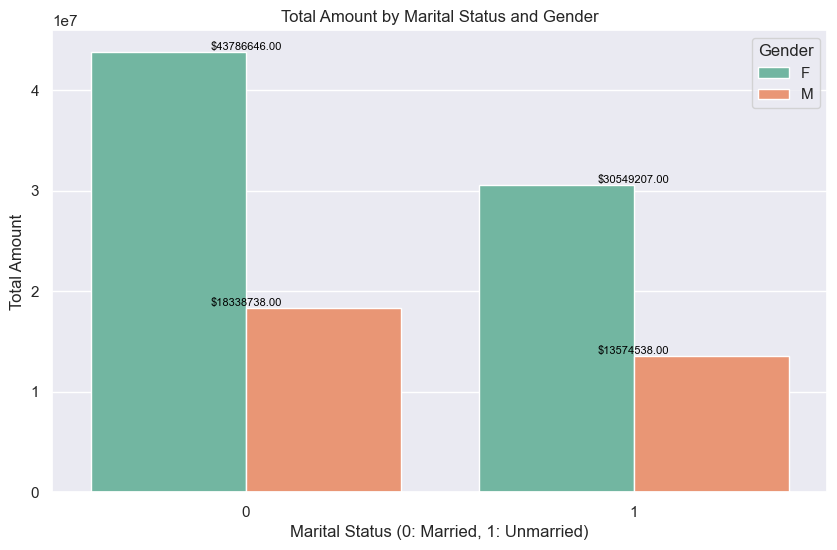

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Marital_Status' and 'Gender' and calculate the sum of 'Amount' for each group
marital_gender_amount_sum = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()

# Sort the values in descending order
marital_gender_amount_sum = marital_gender_amount_sum.sort_values(by='Amount', ascending=False)

# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=marital_gender_amount_sum, palette='Set2')

# Add text annotations for the total amount at the top of each bar
for i, row in marital_gender_amount_sum.iterrows():
    plt.text(row['Marital_Status'], row['Amount'] + 0.1, f"${row['Amount']:.2f}", ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Marital Status (0: Married, 1: Unmarried)')
plt.ylabel('Total Amount')
plt.title('Total Amount by Marital Status and Gender')

# Display the plot
plt.show()




*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

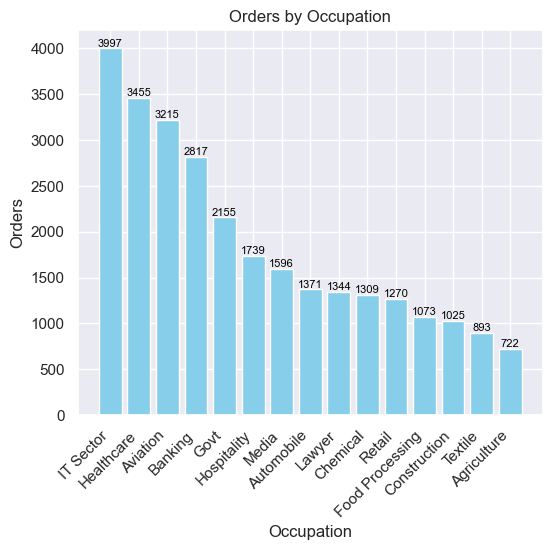

In [26]:
# Bar plot- Orders vs Occupation

import matplotlib.pyplot as plt

# Group by 'Occupation' and calculate the sum of 'Orders' for each group
occupation_orders_sum = df.groupby('Occupation')['Orders'].sum()

# Sort the values in descending order
occupation_orders_sum = occupation_orders_sum.sort_values(ascending=False)

# Get unique occupations for positioning
unique_occupations = occupation_orders_sum.index

# Plot the bar chart
bars = plt.bar(unique_occupations, occupation_orders_sum, color='skyblue')

# Add text annotations for the count at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Orders')
plt.title('Orders by Occupation')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


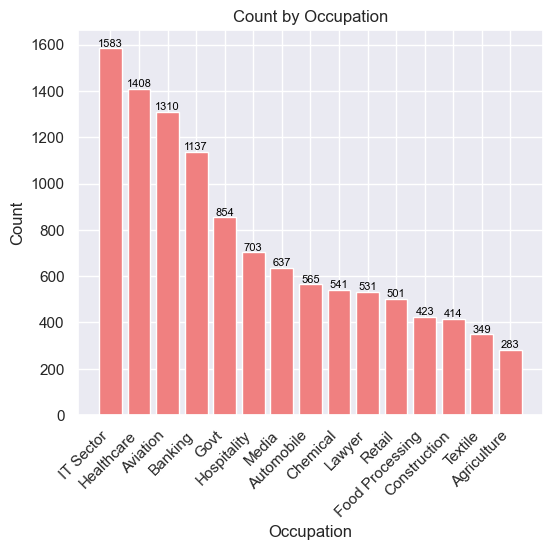

In [27]:
#Bar plot- Count vs Occupation 
import matplotlib.pyplot as plt

# Group by 'Occupation' and calculate the count for each group
occupation_count = df['Occupation'].value_counts().sort_values(ascending=False)

# Get unique occupations for positioning
unique_occupations = occupation_count.index

# Plot the bar chart
bars = plt.bar(unique_occupations, occupation_count, color='lightcoral')

# Add text annotations for the count at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count by Occupation')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()



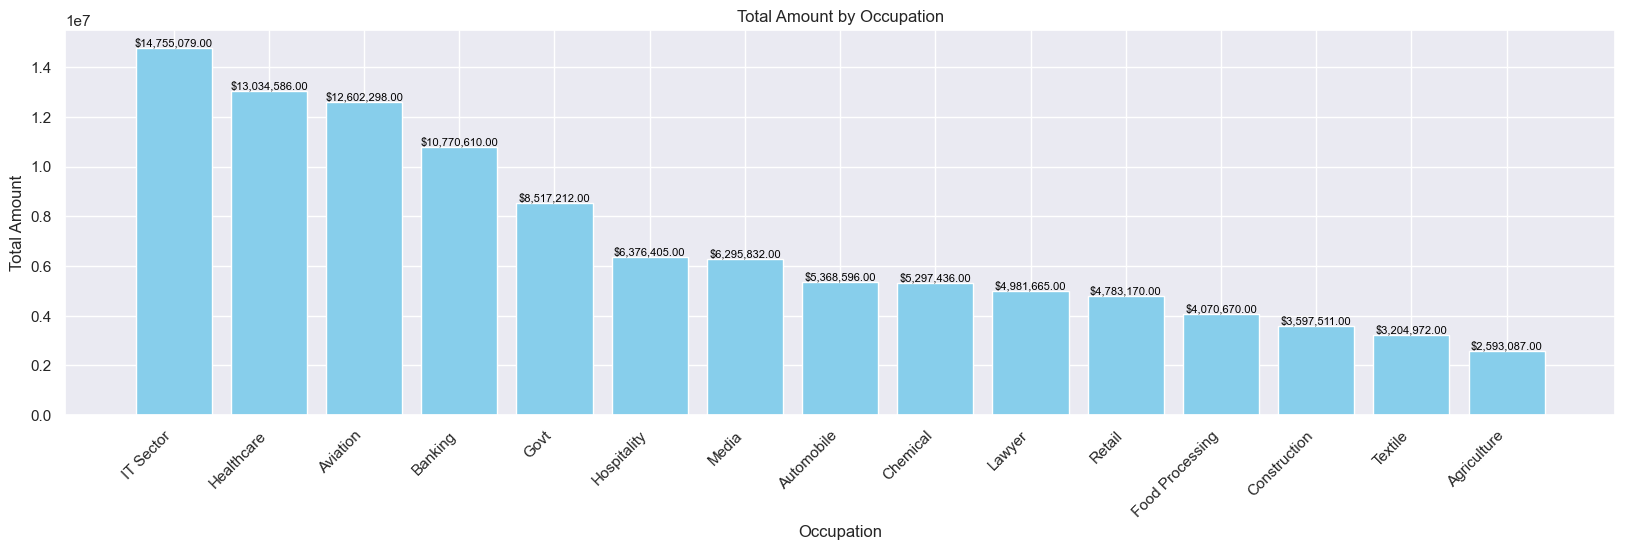

In [29]:
# Bar plot- Total Amount vs Occupation 
# It shows the purchasing power with respect to Occupation

import matplotlib.pyplot as plt

# Group by 'Occupation' and calculate the sum of 'Amount' for each group
occupation_amount_sum = df.groupby('Occupation')['Amount'].sum()

# Sort the values in descending order
occupation_amount_sum = occupation_amount_sum.sort_values(ascending=False)

# Get unique occupations for positioning
unique_occupations = occupation_amount_sum.index

# Plot the bar chart
bars = plt.bar(unique_occupations, occupation_amount_sum, color='skyblue')

# Add text annotations for the total amount at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, f"${height:,.2f}", ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Total Amount')
plt.title('Total Amount by Occupation')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

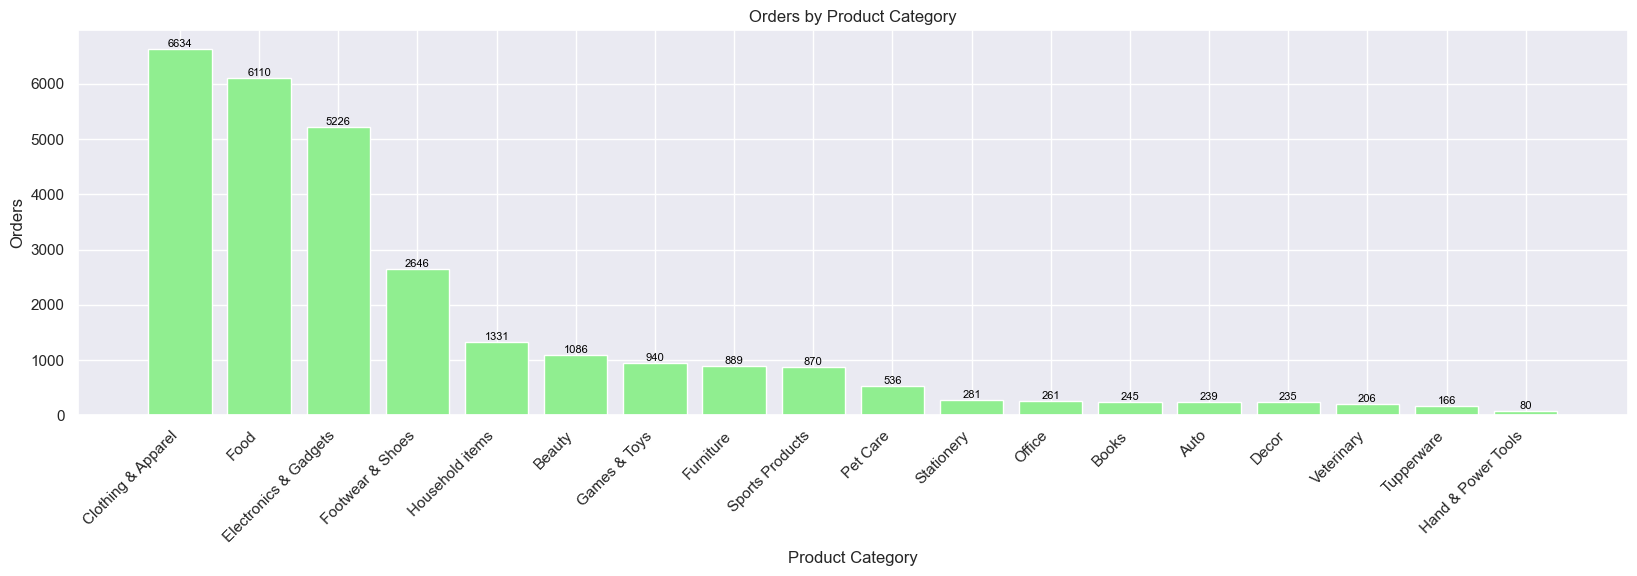

In [31]:
# Bar plot- Orders vs Product category 
import matplotlib.pyplot as plt

# Group by 'Product_Category' and calculate the sum of 'Orders' for each group
category_orders_sum = df.groupby('Product_Category')['Orders'].sum()

# Sort the values in descending order
category_orders_sum = category_orders_sum.sort_values(ascending=False)

# Get unique product categories for positioning
unique_categories = category_orders_sum.index

# Plot the bar chart
bars = plt.bar(unique_categories, category_orders_sum, color='lightgreen')

# Add text annotations for the count at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Orders')
plt.title('Orders by Product Category')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


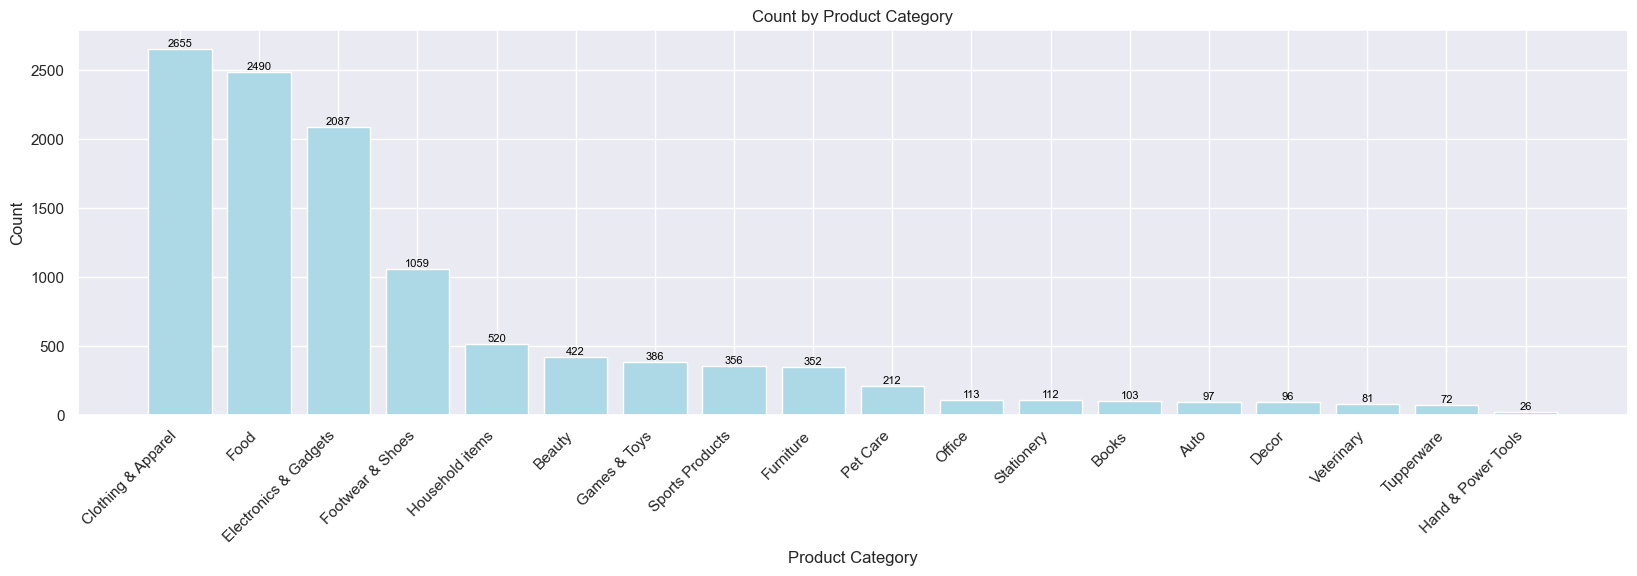

In [32]:
# Bar plot-Count vs Product Category 
# it shows the sell in each product category

import matplotlib.pyplot as plt

# Group by 'Product_Category' and calculate the count for each group
category_count = df['Product_Category'].value_counts().sort_values(ascending=False)

# Get unique product categories for positioning
unique_categories = category_count.index

# Plot the bar chart
bars = plt.bar(unique_categories, category_count, color='lightblue')

# Add text annotations for the count at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count by Product Category')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


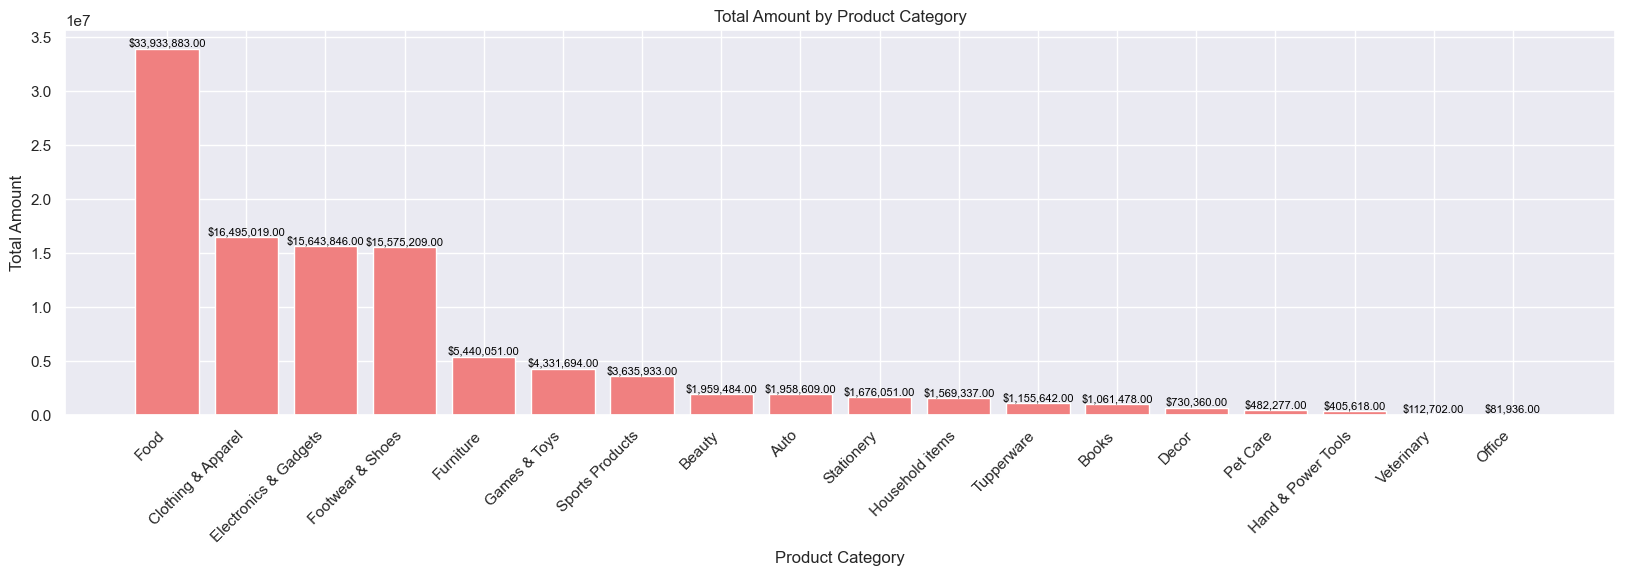

In [34]:
# Bar plot- Toatl Amount vs Product Category
import matplotlib.pyplot as plt

# Group by 'Product_Category' and calculate the sum of 'Amount' for each group
category_amount_sum = df.groupby('Product_Category')['Amount'].sum()

# Sort the values in descending order
category_amount_sum = category_amount_sum.sort_values(ascending=False)

# Get unique product categories for positioning
unique_categories = category_amount_sum.index

# Plot the bar chart
bars = plt.bar(unique_categories, category_amount_sum, color='lightcoral')

# Add text annotations for the total amount at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, f"${height:,.2f}", ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Product Category')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

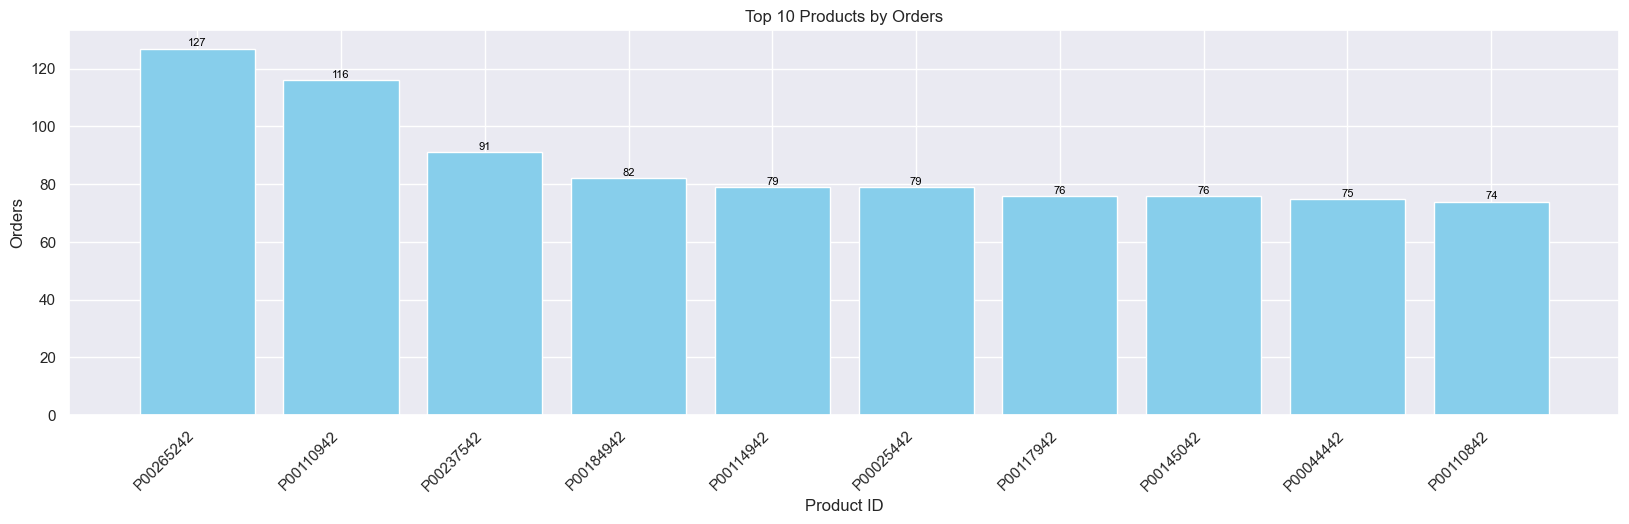

In [36]:
# Bar plot-Orders vs Product ID(Top 10) 
import matplotlib.pyplot as plt

# Group by 'Product_ID' and calculate the sum of 'Orders' for each group
product_orders_sum = df.groupby('Product_ID')['Orders'].sum()

# Select the top 10 products based on orders
top_10_products = product_orders_sum.sort_values(ascending=False).head(10)

# Get unique product IDs for positioning
unique_products = top_10_products.index

# Plot the bar chart
bars = plt.bar(unique_products, top_10_products, color='skyblue')

# Add text annotations for the count at the top of each bar
for bar in bars:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    plt.text(width, height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8, color='black')

# Add labels and title
plt.xlabel('Product ID')
plt.ylabel('Orders')
plt.title('Top 10 Products by Orders')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!